<a href="https://colab.research.google.com/github/akinolanath5519/Fraud-detection-using-NLP/blob/main/Using_ML_and_DL_for_Fraud_detection_using_NLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import *
from ast import literal_eval
from tensorflow.random import set_seed
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Input, Activation, Dot, Concatenate, Reshape, ZeroPadding1D
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [ ]:
import pickle
from google.colab import files

df=files.upload()

Saving Fraud Detection with Natural Language Processing.pkl to Fraud Detection with Natural Language Processing.pkl


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_pickle("Fraud Detection with Natural Language Processing.pkl")
df.head(5)

,actions,times,execution_time,Amount,device_freq,ip_freq,beneficiary_freq,application_freq,is_fraud
0,"[[2], [23], [6], [7], [14], [25], [28], [6], [...","[0, 47000.0, 640000.0, 6000.0, 54000.0, 10000....",203,15,1.0,1.000000,1.000000,1.0,0
1,"[[22], [27], [24], [1], [1268], [1269], [1267]...","[0, 33204.0, 215636.0, 443415.0, 72586.0, 3424...",203,13,1.0,1.000000,0.500000,1.0,0
2,"[[22], [24], [27], [1], [1268], [1269], [1267]...","[0, 25459.0, 46236.0, 428626.0, 42785.0, 74158...",359,310,1.0,0.333333,0.333333,1.0,0
3,"[[22], [1], [29], [22], [26], [2], [23], [25],...","[0, 440927.0, 5785.0, 46875.0, 968650.0, 31175...",250,350,1.0,0.500000,0.500000,1.0,0
4,"[[22], [24], [27], [72], [1269], [1268], [1267...","[0, 93894.0, 46810.0, 548388.0, 132548.0, 3784...",203,350,1.0,0.600000,0.400000,1.0,0


In [ ]:
#checking the number of row and columns
df.shape

(105303, 9)

# **Data Cleaning**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 actions             0
times               0
execution_time      0
Amount              0
device_freq         0
ip_freq             0
beneficiary_freq    0
application_freq    0
is_fraud            0
dtype: int64


# **Text Preprocessing**

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Remove special characters, punctuation, and unnecessary formatting
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenization
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

# Apply text preprocessing to the "actions" column
df['actions'] = df['actions'].apply(preprocess_text)

In [ ]:
#checking for duplicates

# Convert list values to tuples in the 'actions' column
df['actions'] = df['actions'].apply(tuple)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate rows found:\n", duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


# **Exploratory Data Analysis**

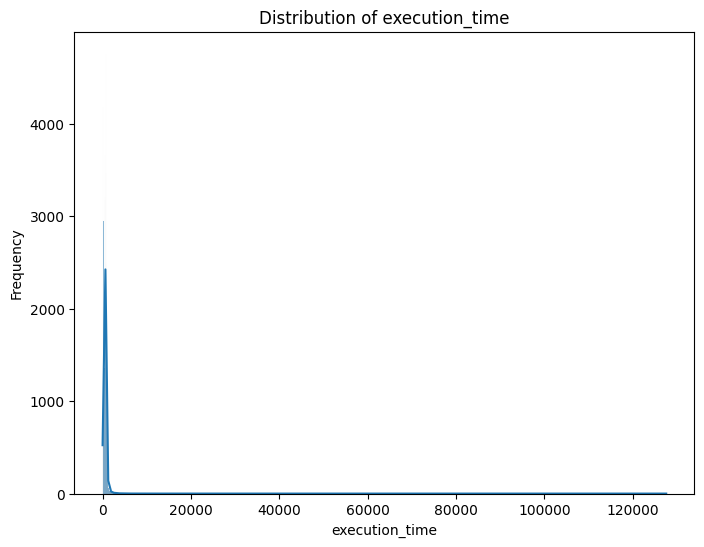

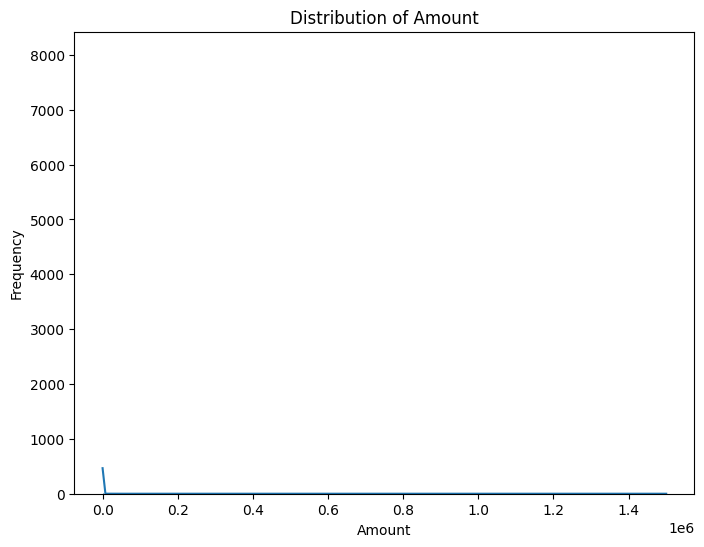

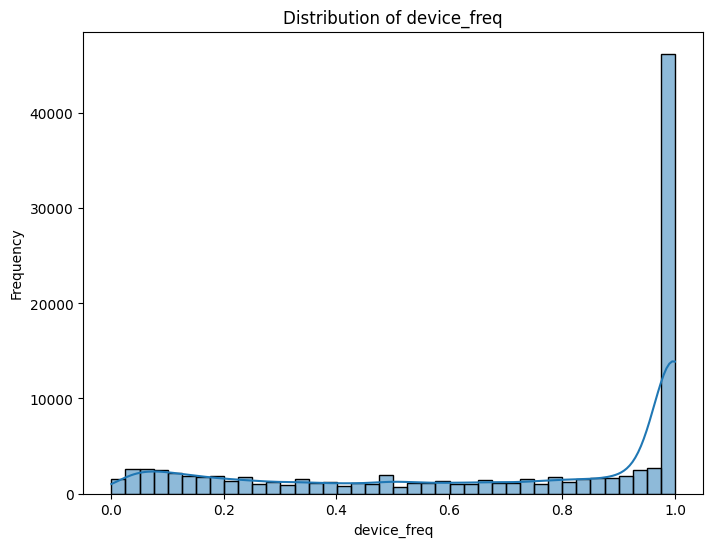

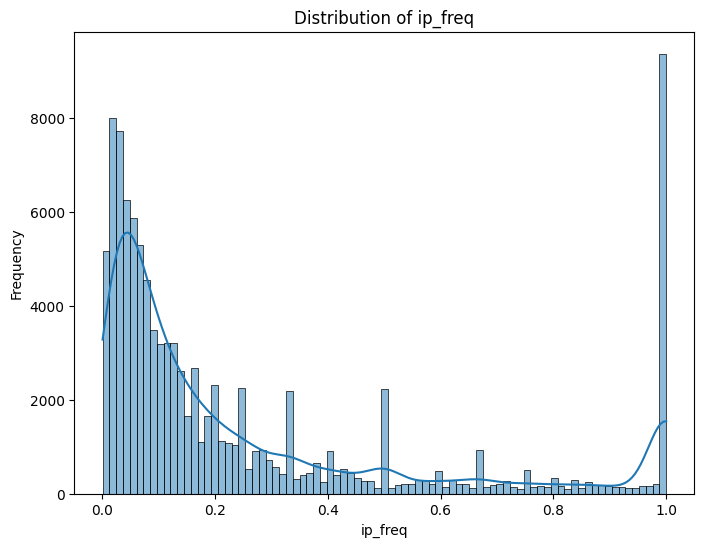

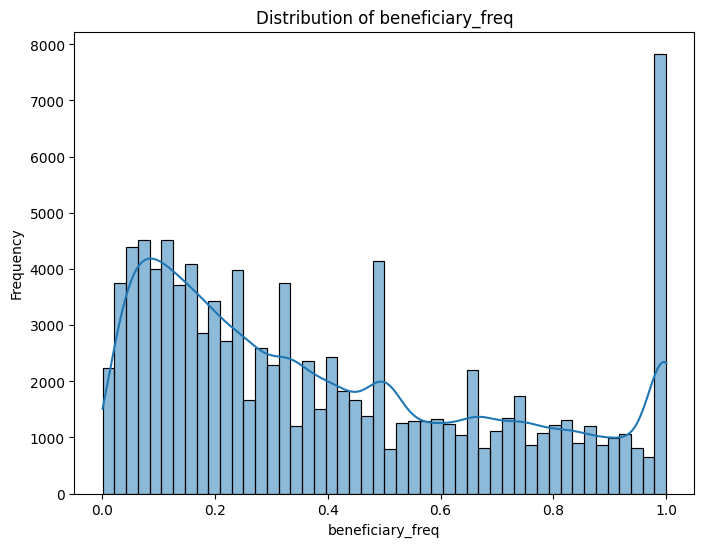

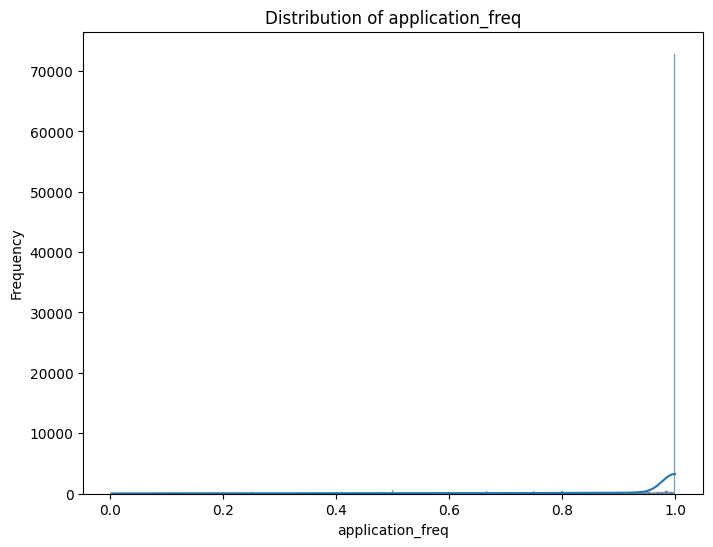

In [ ]:
# Distribution Plots for Numerical Features
num_cols = ['execution_time', 'Amount', 'device_freq', 'ip_freq', 'beneficiary_freq', 'application_freq']
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

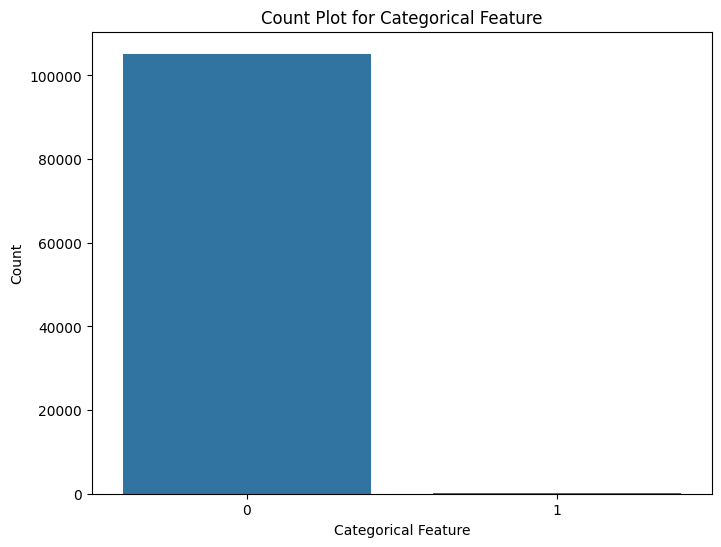

In [ ]:
# Count Plot for a Categorical Feature
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df)
plt.title('Count Plot for Categorical Feature')
plt.xlabel('Categorical Feature')
plt.ylabel('Count')
plt.show()

the dataset is imbalance we need to fix this issues because it will pose problems for our machine learning algorithm

In [ ]:
#handling the imbalance dataset
pip install -U imbalanced-learn



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
# Replace 'categorical_features' with the names of your categorical features
categorical_features = ['is_fraud']
df_encoded = pd.get_dummies(df, columns=categorical_features)